# Final Project

**Due December 7th, 2022 (Wednesday)**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
Warning message:
“package ‘stringr’ was built under R version 4.2.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
ferris_wheels = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-08-09/wheels.csv')


#show a scatter plot of the height of the ferris wheels and 


New names:
• `` -> `...1`
Rows: 73 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (11): name, country, location, climate_controlled, construction_cost, s...
dbl   (9): ...1, height, diameter, number_of_cabins, passengers_per_cabin, s...
date  (2): opened, closed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
ferris_wheels |> head()

...1,name,height,diameter,opened,closed,country,location,number_of_cabins,passengers_per_cabin,⋯,ride_duration_minutes,climate_controlled,construction_cost,status,design_manufacturer,type,vip_area,ticket_cost_to_ride,official_website,turns
<dbl>,<chr>,<dbl>,<dbl>,<date>,<date>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,360 Pensacola Beach,200.00,NA,2012-07-03,2013-01-01,USA,Pensacola Beach; Florida,42,6,⋯,12.0,Yes,Unknown,Moved,Realty Masters of FL,Transportable,Yes,NA,NA,4
2,Amuran,303.00,199.8,2004-01-01,NA,Japan,Kagoshima; Kyushu,36,NA,⋯,14.5,Yes,Unknown,Operating,NA,NA,NA,NA,NA,1
3,Asiatique Sky,200.00,200.0,2012-12-15,NA,Tailand,Asiatique the Riverfront,42,NA,⋯,NA,Yes,Unknown,Operating,Dutch Wheels (Vekoma),NA,NA,NA,http://www.asiatiquesky.com/,NA
4,Aurora Wheel,295.00,272.0,NA,NA,Japan,Nagashima Spa Land; Mie; Honshu,NA,NA,⋯,NA,NA,Unknown,Operating,NA,Fixed,NA,NA,http://www.nagashima-onsen.co.jp/,NA
5,Baghdad Eye,180.00,NA,2011-01-01,NA,Iraq,Al-Zawraa Park; Baghdad,40,6,⋯,15.0,NA,$6 million USD,Operating,NA,NA,NA,3.5,NA,NA
6,Beijing Great Wheel,692.64,642.7,NA,NA,China,Chaoyang Park; Beijing,48,40,⋯,20.0,yes,$290 million USD,Delayed,The Great Wheel Corporation,Fixed,NA,NA,NA,1


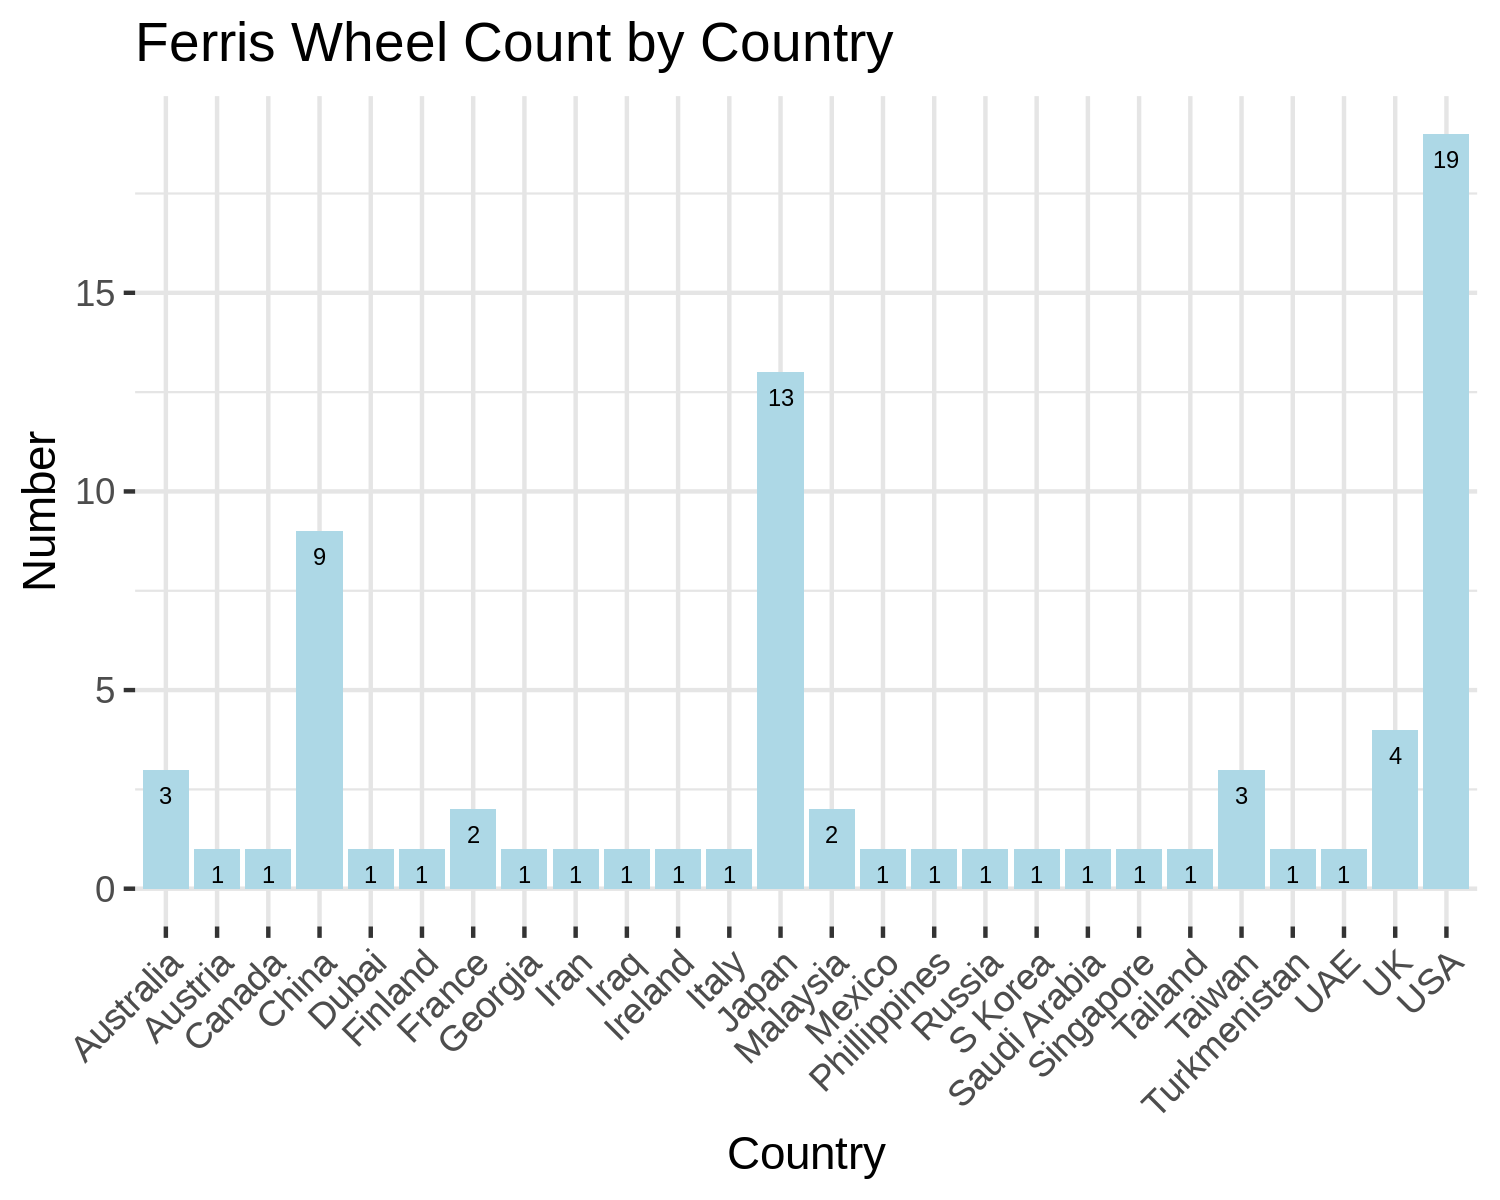

In [4]:
bar_data = ferris_wheels |> 
    group_by(country)|>
    summarize(Number = n())

p = ggplot(bar_data, aes(x=country, y=Number, label= Number)) + geom_col(fill = "#ADD8E6") + geom_text(color = 'black', vjust = 2, size = 2) + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          plot.background = element_rect(fill = '#FFFFFF'),
          panel.background = element_rect(fill = '#FFFFFF'),
          strip.background = element_blank(),
          panel.grid = element_line(color = 'grey90'),) + 
    labs(title = "Ferris Wheel Count by Country", x = 'Country') 

p 





In [5]:
tallest_ferris_operating = ferris_wheels |> 
    group_by(status)|>
    summarize(tallest_ft = max(height))

tallest_ferris_operating


status,tallest_ft
<chr>,<dbl>
Defunct,328.00
Delayed,692.64
Design/Financing,NA
In development,728.00
Moved,200.00
Operating,541.00
Planned,492.13
Relocated,394.00
SBNO,394.00


Warning message in pal_name(palette, type):
“Unknown palette Set5”
Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Greens is 9
Returning the palette you asked for with that many colors
”


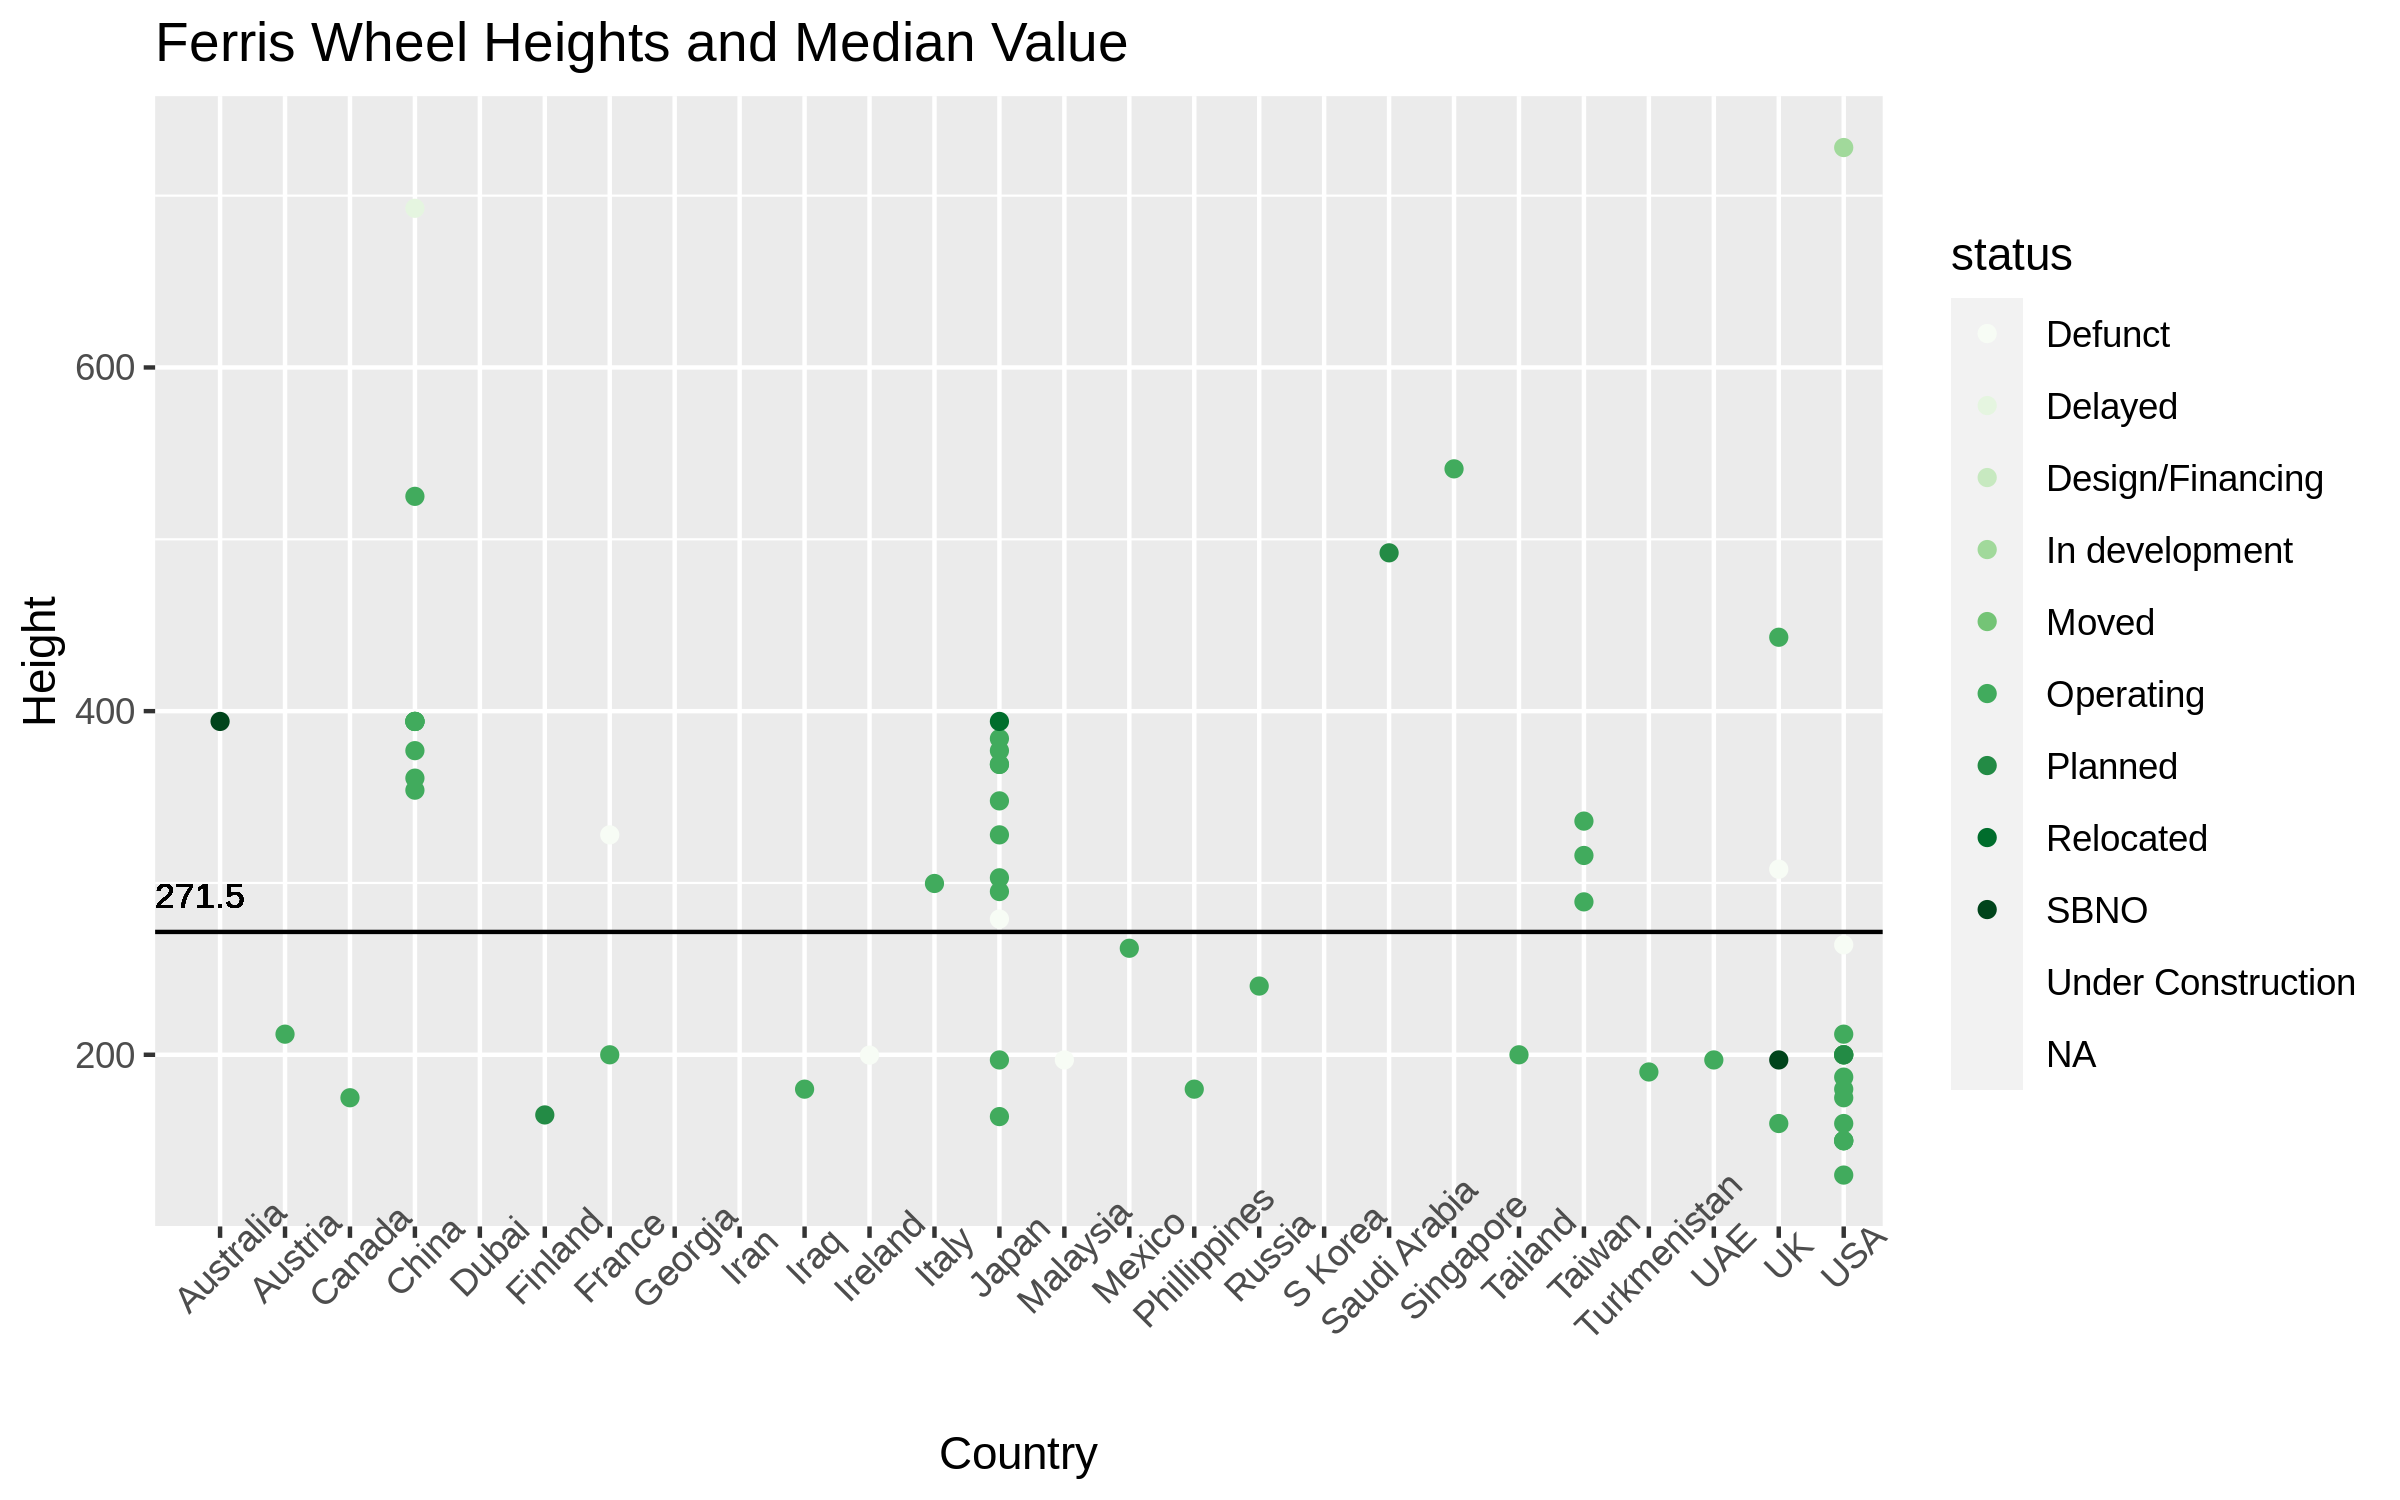

In [11]:

#median_height = ferris_wheels |>
#    summarize(median = median(height, na.rm=T))

median = median(ferris_wheels$height, na.rm=T)

options(repr.plot.height = 5, repr.plot.width = 8)
              
p = ggplot(ferris_wheels, aes(x = country, y = height, color = status)) + geom_point(na.rm=T) +
    theme(axis.text.x = element_text(angle = 45)) +
    scale_color_brewer(palette = 'Set5') +
    geom_hline(yintercept = median) + geom_text(aes(0,median,label = median, hjust = 0, vjust = -1), size = 3, color='black') +
    labs(title = "Ferris Wheel Heights and Median Value", x = 'Country', y = 'Height') 


p

The dataset selected for this analysis includes information on ferris wheels across the world. The location and size related measurements of the ferris wheels are the focus of this analysis project. First, a bar chart is employed to demonstrate the number of ferris wheels documented for each country. As displayed in this figure, the USA has the most ferris wheels (documented in the dataset) while numerous countries only have one. Next, a table is constructed to identify the tallest height of a ferris wheel within each status category. The tallest ferris wheel that was actually operating is 541 ft while a 728 ft ferris wheel was in development, at the time of data collection.  

The final figure presented displays the individual heights of all of the ferris wheels within the dataset, organized by country. The color coding within the figure allows one to identfy the status of the ferris wheel while identifying its height and country of location. Lastly, the line that runs across the plot is indicative of the median height of the ferris wheels. This value is also identifiable within the plot, median = 271.5 ft. This figure also indicates that the tallest ferris wheel, among all the countries, is located in the USA but was in development. Key takeaways from these two charts and table include: (1) USA has the largest number of ferris wheels, (2) the tallest ferris wheel that is currently being operated is 541 ft, (3)median height of the ferris wheels is 271.5 ft. 



## Note to Professor 

### Chuck, thank you for a great semester. I learned a lot and truly appreciated how you made learning R non-stressful. Happy winter!